## 学習テクニック

MNISTで最適化問題のいくつかの方法についての比較

===========iteration:0===========
Momentum:2.43744579923788
SGD:2.4248238189617712
Adam:2.122441619295042
AdaGrad:1.8886976832592621
===========iteration:100===========
Momentum:0.37720854938103
SGD:1.3345704544523982
Adam:0.30035291817659715
AdaGrad:0.1912166839542192
===========iteration:200===========
Momentum:0.2970355529388327
SGD:0.7800019363632638
Adam:0.21635682442866822
AdaGrad:0.13810151477988797
===========iteration:300===========
Momentum:0.14380667626144428
SGD:0.44229940432881615
Adam:0.12829508533883502
AdaGrad:0.08969002430458946
===========iteration:400===========
Momentum:0.1742452551517642
SGD:0.35190234608152143
Adam:0.08109061752174868
AdaGrad:0.05088144705208912
===========iteration:500===========
Momentum:0.21607290883734998
SGD:0.31475711214226587
Adam:0.14595999814376545
AdaGrad:0.07570472343189945
===========iteration:600===========
Momentum:0.2825011806233554
SGD:0.3685536620607016
Adam:0.16297588046354566
AdaGrad:0.0800419459108023
===========iteration:700==

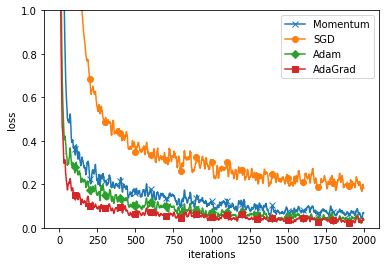

In [2]:
#　丸コピ・・
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

%matplotlib inline

# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()
